# Introduction

I chose the Titanic dataset because I'm interested to find out the factors that led to the survival of the people involved.

## The Dataset

The dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.
The dataset consists of the following columns:
* PassengerId - A numerical ID assigned to each passenger.
* Survived - Variable that tells if a passenger survived or not. Survived - 1, didn't survive - 0. This is our dependent variable.
* Pclass - Socio economic of class the passenger - First class - 1, Second class - 2, or Third class - 3. This is one of our independent variables.
* Name - Full name of the passenger.
* Sex - Gender of the passenger - male or female. This is also one of our independent variables.
* Age - Age of the passenger. This is also one of our independent variables.
* SibSp - Number of siblings and spouses the passenger had on board.
* Parch - Number of parents and children the passenger had on board.
* Ticket - Ticket number of the passenger.
* Fare - Amount the passenger paid for the ticket.
* Cabin - Cabin that the passenger was in.
* Embarked - Boarding point of the passenger.

# Questions

Below are some of the questions I had after going through the dataset:
1. Is there any relationship between sex, age and survival of the passengers?
2. Which social class had a better chance of survival?
3. Did different age groups (Child, Adults, Seniors) had any effect on the survival of passengers?

# Data Wrangling

In [219]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reads the data into Pandas Dataframe and store in a dataset variable
titanic_df = pd.read_csv('titanic-data.csv')

titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [220]:
# Prints summary statistics of the data
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [221]:
# Prints a summary of the dataframe
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From the above function, I can see that Age, Cabin and Embarked have missing values. Although Age is important for our analysis, Cabin and Embarked won't make much of a different in our case, so we're gonna drop those columns. Also, we have around 80% data in our Age column, so we'll keep it.
I'm going to remove Name, SibSp, Parch, Ticket, Fare, Cabin and Embarked from the data as these are not important to our analysis.

## Remove duplicates

In [222]:
# We are checking for any duplicates in the titanic dataframe
dup_titanic = titanic_df.duplicated()
print 'No. of duplicate entries are {}'.format(dup_titanic.sum())

No. of duplicate entries are 0


We can see that there are no duplicate rows in our data. 

## Remove unnecessary columns

In [223]:
# Removing unnecessary columns
titanic_df.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], inplace = True, axis = 1)

In [224]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


## Fix missing values

To decide whether we can ignore the missing data or we need to substitute it, we need to compare the differences in mean with the age as null and without it.

In [225]:
# Creating two dataframes for comparison
age_null = titanic_df[titanic_df['Age'].isnull()]
age_notnull = titanic_df[titanic_df['Age'].notnull()]

We're going to perform a t-test for independent variables as there are 2 independent samples. We'll use the function from scipy.stats to do this.

H0 = Sample population means are same/equal

Ha = Sample population means are not same

In [226]:
from scipy import stats
# Performing a t test on the two samples
stats.ttest_ind(age_notnull['Survived'], age_null['Survived'])

Ttest_indResult(statistic=2.7606993230995345, pvalue=0.0058865348400755626)

There is a significant difference in the means, so I'm going to reject the null. I'm going to replace the null values with mean.

In [227]:
# Imputing missing values with the mean
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df.info()
titanic_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


,PassengerId,Survived,Pclass,Age
count,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118
std,257.353842,0.486592,0.836071,13.002015
min,1.000000,0.000000,1.000000,0.420000
25%,223.500000,0.000000,2.000000,22.000000
50%,446.000000,0.000000,3.000000,29.699118
75%,668.500000,1.000000,3.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000


# Exploration and Visualization

## Question 1

### Is there any relationship between sex, age and survival of the passengers?

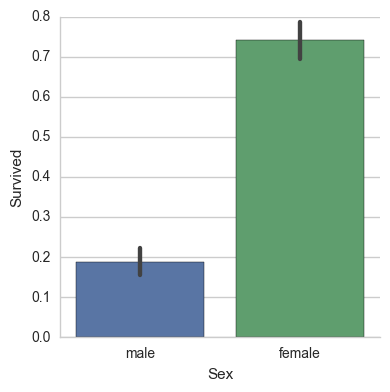

In [228]:
# Plot of Sex vs Survived
sns.factorplot('Sex', 'Survived', data = titanic_df, kind = 'bar')

I'm going to use chi squared test for independence for sex & age with survial as the categorical variable. Although, chi square says that there is a significance relationship between variables, it does not show how significant the relationship is. So, I'll use Cramer's V to test the strength of the association between Sex/Age & Survival.

In [229]:
# Function to calculate chi square, p value & Cramer's V
import scipy.stats as stats
def chi_squared(dframe, var1, var2):
    chi_crosstab = pd.crosstab(dframe[var2], dframe[var1])
    
    var2_index = dframe[var2].unique()
    chi_crosstab.index = var2_index
    
    var1_sum = chi_crosstab.sum()
    var1_index = var1_sum.index
    var1_total = chi_crosstab.sum().sum()
    
    exp_coef = chi_crosstab.sum(axis = 1)/var1_total
    
    chi_crosstab_exp = pd.DataFrame(np.outer(exp_coef, chi_crosstab.sum()))
    chi_crosstab_exp.columns = var1_index
    chi_crosstab_exp.index = var2_index
    
    chi2_df = (chi_crosstab - chi_crosstab_exp)**2/chi_crosstab_exp
    chi2 = chi2_df.sum().sum()
    
    dfree = (len(dframe[var1].unique()) - 1)* (len(dframe[var2].unique()) - 1)
    vcritical = stats.chi2.ppf(q = 0.95, df = dfree)
    p = 1 - stats.chi2.cdf(x = chi2, df = dfree)
    
    cramer_v = np.sqrt(chi2/len(dframe))
    
    return chi2, p, cramer_v

In [230]:
chi_squared(titanic_df,'Age','Survived')

(113.79431126384412, 0.033583164593336101, 0.35737274153241944)

In [231]:
chi_sq(titanic_df,'Sex','Survived')

(263.05057407065567, 0.0, 0.54335138065775512)

The above tests show that age & sex did influence the survival of the passengers. Cramer's V calculated shows that Sex had a strong influence on the survival of the passengers, while age had a medium influence on the survival. 

## Question 2

### Which social class had a better chance of survival?

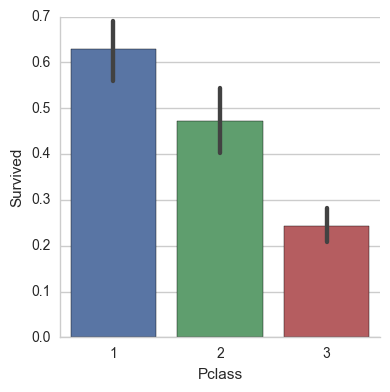

In [232]:
# Plot of Pclass vs Survived
sns.set_style("whitegrid")
sns.factorplot('Pclass','Survived', data = titanic_df, kind = 'bar')

We can see from the above plot that the survival rate of Pclass 1 was the highest followed by Pclass 2 and Pclass 3 had the lowest survival rate. Let's dig deep into this and see if this applies for both male and female.

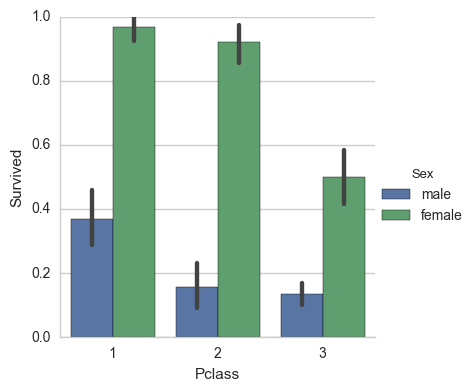

In [233]:
# Plot of Pclass vs Survived of male & female separately
sns.factorplot('Pclass','Survived', hue = 'Sex', data = titanic_df, kind = 'bar')

In [234]:
# Function to calculate the survival rate
def survival_percent(Pclass, Sex):
    all_grp = titanic_df.groupby(['Pclass', 'Sex']).size()[Pclass, Sex].astype('float')
    survived_sex_grp = titanic_df.groupby(['Pclass', 'Survived', 'Sex']).size()[Pclass,1,Sex].astype('float')
    survived = (survived_sex_grp/all_grp * 100).round(2)
    return survived

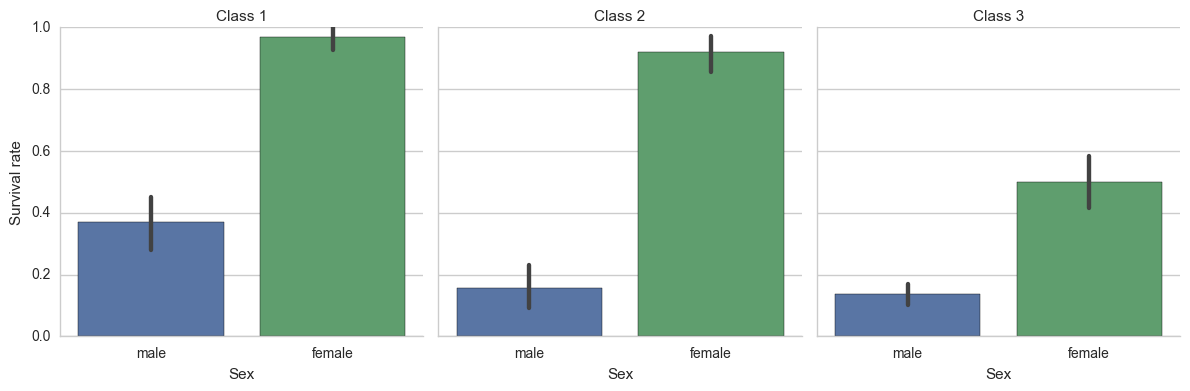

In [235]:
graph = sns.factorplot('Sex', 'Survived', col = 'Pclass', data = titanic_df, kind = 'bar')
(graph.set_axis_labels('Sex', 'Survival rate').set_titles("Class {col_name}")
)

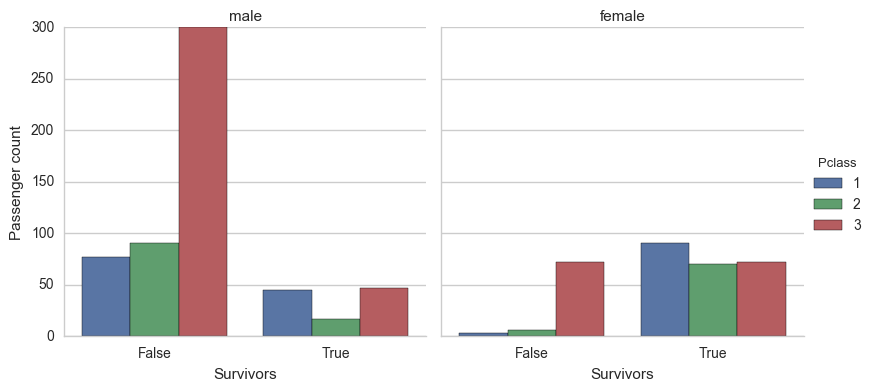

In [236]:
graph = sns.factorplot('Survived', col='Sex', hue='Pclass', data=titanic_df, kind='count')
(graph.set_axis_labels('Survivors', 'Passenger count').set_xticklabels(['False', 'True']).set_titles('{col_name}')
)

Looking at the above graphs we find out that the survival rate of the male passengers in class 1 is higher than those in class 2 & 3. Survival rate of female passengers in class 1 is slightly higher than class 2, and survival rate of a class 3 female passenger is significantly lower than class 2.

## Question 3

### Did different age groups (Child, Adults, Seniors) had any effect on the survival of passengers?

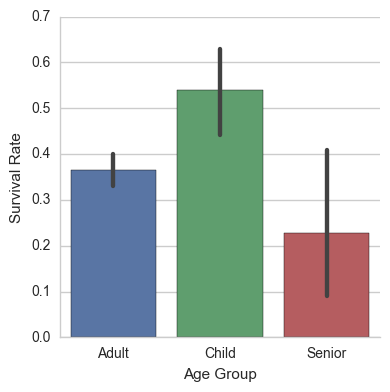

In [237]:
# Function to divide the passengers into different age groups
def age_group(age):
    if age < 18:
        return 'Child'
    elif age > 60: 
        return 'Senior'
    else:
        return 'Adult'
    
titanic_df['Age_gr'] = titanic_df['Age'].apply(age_group)    
plot = sns.factorplot('Age_gr', 'Survived',data = titanic_df, kind="bar")
plot.set_axis_labels("Age Group", "Survival Rate")

In [238]:
chi_squared(titanic_df,'Age_gr','Survived')

(15.030221080773899, 0.00054478979203753664, 0.12988046425562583)

Using the chi square test on the age groups, even though the age groups are associated. The effect of age groups on the survival is very weak. So, we can say that the age groups did not play a major role in passenger survival.

# Conclusion 

Based on the calculation and observations, I can tell that the sex/age did affect the survival of the passengers. Women & children had a better chance of survival on the titanic. Passengers in the first class had an advantage over the passengers in other classes for survival.

# Limitations

* We are using only a sample of the whole population. Our data set includes only 891 people out of the 2224 people on the titanic. 
* Handling missing values. We have a whole lot of missing values in the age column. I have imputed the missing values with the mean.
* The titanic had 1317 passengers & 885 crew members. We don't have a variable that represents whether the person is a passenger or a crew member.

# References

Kaggle - https://www.kaggle.com/c/titanic

Scipy Stats - https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.ttest_ind.html 

Markdown Cheatsheet - https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#lines

Cramer's V - http://changingminds.org/explanations/research/analysis/cramers_v.htm